# <b><span style='color:#F1C40F'>|</span> Зчитуємо дані з [датасету](https://www.kaggle.com/datasets/ealaxi/paysim1/data):</b>

In [1]:
import pandas as pd

data = pd.read_csv("PS_20174392719_1491204439457_log.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# <b><span style='color:#F1C40F'>|</span> Попередня обробка:</b>

In [2]:
data['type'] = data['type'].str.lower()

data = data.rename(
    columns={
        'oldbalanceOrg':'oldBalanceOrig',
        'newbalanceOrig':'newBalanceOrig',
        'oldbalanceDest':'oldBalanceDest',
        'newbalanceDest':'newBalanceDest'
    }
)

data.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,payment,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,payment,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,transfer,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,cash_out,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,payment,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# <b><span style='color:#F1C40F'>|</span> Аналіз даних:</b>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
data = data.drop(
    columns=['nameOrig','nameDest','isFlaggedFraud','step']
)
data.head()

,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
0,payment,9839.64,170136.0,160296.36,0.0,0.0,0
1,payment,1864.28,21249.0,19384.72,0.0,0.0,0
2,transfer,181.00,181.0,0.00,0.0,0.0,1
3,cash_out,181.00,181.0,0.00,21182.0,0.0,1
4,payment,11668.14,41554.0,29885.86,0.0,0.0,0


In [8]:
data['type'].value_counts()

type
cash_out    2237500
payment     2151495
cash_in     1399284
transfer     532909
debit         41432
Name: count, dtype: int64

# <b><span style='color:#F1C40F'>|</span> Графіки:</b>

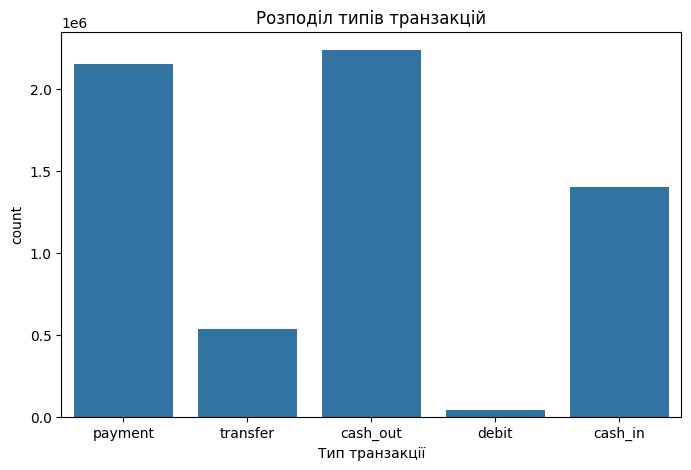

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Розподіл типів транзакцій
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=data)
plt.title("Розподіл типів транзакцій")
plt.xlabel("Тип транзакції")
plt.show()

C:\Users\sviat\AppData\Local\Temp\ipykernel_26212\1251224242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=data, palette="pastel")


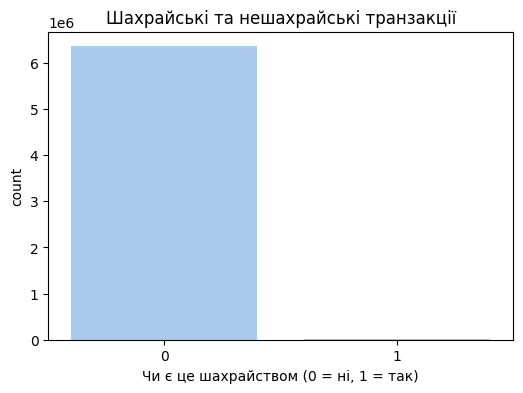

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data, palette="pastel")
plt.title("Шахрайські та нешахрайські транзакції")
plt.xlabel("Чи є це шахрайством (0 = ні, 1 = так)")
plt.show()

# <b><span style='color:#F1C40F'>|</span> Спрощення даних:</b>

In [9]:
type_df = pd.get_dummies(data['type'])
type_df

,cash_in,cash_out,debit,payment,transfer
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [10]:
train_df = pd.concat([data, type_df], axis=1)
train_df = train_df.drop(columns=['type'])
train_df

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,cash_in,cash_out,debit,payment,transfer
0,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,False,True,False
1,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,False,True,False
2,181.00,181.00,0.00,0.00,0.00,1,False,False,False,False,True
3,181.00,181.00,0.00,21182.00,0.00,1,False,True,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,False,True,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,False,True
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,False,True,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,False,True


# <b><span style='color:#F1C40F'>|</span> Масштабування:</b>

In [11]:
X = train_df.drop(columns=['isFraud'], axis=1)
y = train_df['isFraud']

print("X:\n", X[:5].to_string())
print("\n\ny:\n", y[:5])

X:
      amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  newBalanceDest  cash_in  cash_out  debit  payment  transfer
0   9839.64        170136.0       160296.36             0.0             0.0    False     False  False     True     False
1   1864.28         21249.0        19384.72             0.0             0.0    False     False  False     True     False
2    181.00           181.0            0.00             0.0             0.0    False     False  False    False      True
3    181.00           181.0            0.00         21182.0             0.0    False      True  False    False     False
4  11668.14         41554.0        29885.86             0.0             0.0    False     False  False     True     False


y:
 0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:\n", X_train[:5].to_string())
print("\nX_test:\n", X_test[:5].to_string())
print("\nY_train:\n", Y_train[:5].to_string())
print("\nY_test:\n", Y_test[:5].to_string())

X_train:
             amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  newBalanceDest  cash_in  cash_out  debit  payment  transfer
6271196  386385.08      4669568.85      5055953.92       506035.06       119649.98     True     False  False    False     False
1888243  212458.78       234635.00       447093.78       806037.88       593579.10     True     False  False    False     False
5549957   19967.60         3634.00            0.00            0.00            0.00    False     False  False     True     False
2025342  527616.51       180216.00            0.00        92157.10       619773.61    False      True  False    False     False
682342   206067.85            0.00            0.00      2131494.48      2337562.32    False     False  False    False      True

X_test:
              amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  newBalanceDest  cash_in  cash_out  debit  payment  transfer
3737323   330218.42        20866.00       351084.42       452419.57       122201.15

In [13]:
from sklearn.preprocessing import StandardScaler
import pickle


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


with open("Trained_models/scaler.pkl", 'wb') as f:
    pickle.dump(ss, f)


print("X_train:\n", X_train[:5])
print("\nX_test:\n", X_test[:5])
print("\nY_train:\n", Y_train[:5])
print("\nY_test:\n", Y_test[:5])

X_train:
 [[ 0.34345292  1.32880177  1.43753635 -0.17499203 -0.30114711  1.88362474
  -0.73667044 -0.08101666 -0.71462102 -0.30238726]
 [ 0.05435533 -0.20740058 -0.13941899 -0.0865455  -0.17188343  1.88362474
  -0.73667044 -0.08101666 -0.71462102 -0.30238726]
 [-0.26560052 -0.28741626 -0.29239541 -0.32418077 -0.33378152 -0.53089131
  -0.73667044 -0.08101666  1.3993431  -0.30238726]
 [ 0.57820561 -0.2262506  -0.29239541 -0.29701111 -0.16473891 -0.53089131
   1.35745911 -0.08101666 -0.71462102 -0.30238726]
 [ 0.04373242 -0.28867503 -0.29239541  0.30422426  0.30378619 -0.53089131
  -0.73667044 -0.08101666 -0.71462102  3.30701763]]

X_test:
 [[ 0.25009357 -0.28144733 -0.1722693  -0.19079889 -0.30045128  1.88362474
  -0.73667044 -0.08101666 -0.71462102 -0.30238726]
 [-0.27943076 -0.27815527 -0.28598923 -0.32418077 -0.33378152 -0.53089131
  -0.73667044 -0.08101666  1.3993431  -0.30238726]
 [-0.04569915 -0.25175402 -0.20382689 -0.26483282 -0.32040624  1.88362474
  -0.73667044 -0.08101666 -0.7

# <b><span style='color:#F1C40F'>|</span> Тренування моделей:</b>

<b> Тренуємо моделі паралельно, бо якщо одна за одною дуже багато часу займає </b>

In [14]:
from sklearn.metrics import classification_report, accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


def train_and_evaluate(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print(f"Класифікаційни звіт для {model.__class__.__name__}:\n", classification_report(Y_test, prediction))
    print("Оцінка точності: ", accuracy_score(Y_test, prediction)*100, "%")

    # Зберігання моделі
    with open(f"Trained_models/{model_name}.pkl", 'wb') as f:
        pickle.dump(model, f)
    print(f"Модель збережена як {model_name}.pkl\n\n\n")

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBoostClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Паралельне навчання моделей
with ThreadPoolExecutor() as executor:
    futures = {
        executor.submit(train_and_evaluate, model, model_name, X_train, Y_train, X_test, Y_test): model_name
        for model_name, model in models.items()
    }

    for future in as_completed(futures):
        model_name = futures[future]
        try:
            future.result()
        except Exception as e:
            print(f"Модель {model_name} викликала помилку: {e}")

Класифікаційни звіт для LogisticRegression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.88      0.38      0.53      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524

Оцінка точності:  99.91450063024352 %
Модель збережена як LogisticRegression.pkl



Класифікаційни звіт для XGBClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.78      0.86      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Оцінка точності:  99.96707331256621 %
Модель збережена як XGBoostClassifier.pkl



Класифікаційни звіт для DecisionTreeClassifier:
               precision    recall  f1-score  

<b> Навіть якщо тренувати паралельно, то все це зайняло: 27 хвилин </b>